In [2]:
from evaluate_12ECG_score import evaluate_12ECG_score
from driver import load_challenge_data
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import exp_net_params, default_net_params
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

csv_path="/home/puszkar/ecg/results/csv_outputs/03112020v1"
test_path = "/home/puszkar/ecg/data/test"

# Analiza wyników z użyciem Fast-DTW jako kryterium 

In [3]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

In [4]:
def simmilar(row1, row2):
    for i, x in enumerate(row1):
        if x == row2[i] and x == 1:
            return True
    return False

In [5]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1] --> [0 0 0 0 0 0 0 0 1]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[1 0 0 0 0 0 0 0 0] --> [1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1

161

[]

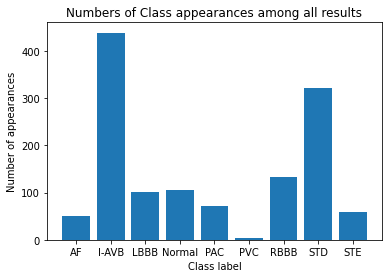

In [6]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [7]:
def numeric_classes(array2d):
    result = []
    for single_array in array2d:
        for idx, value in enumerate(single_array):
            if value != 0:
                result.append(idx)
                break

    return result

y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

[]

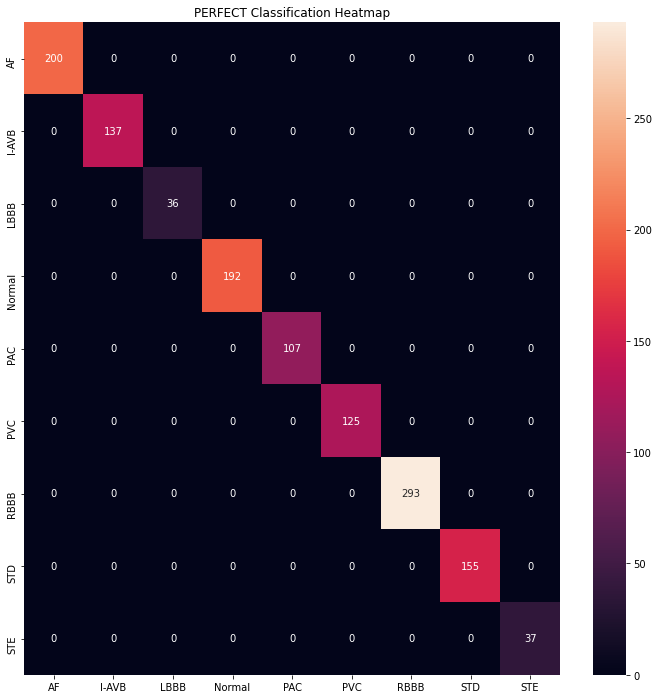

In [8]:
confusion = confusion_matrix(y_true_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("PERFECT Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(default_net_params["classes"]), yticklabels=sorted(default_net_params["classes"]), fmt="g")
plt.plot()

[]

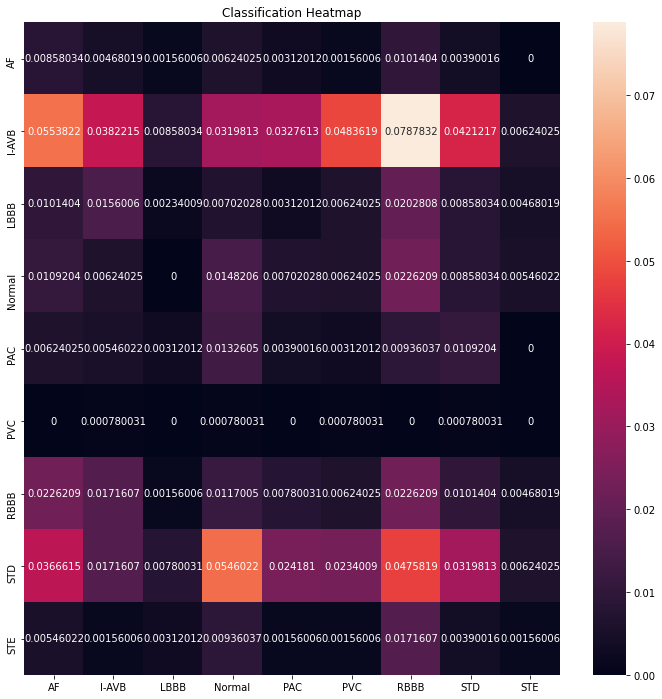

In [9]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion/np.sum(confusion), annot=True, cbar=True, xticklabels=sorted(default_net_params["classes"]), yticklabels=sorted(default_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


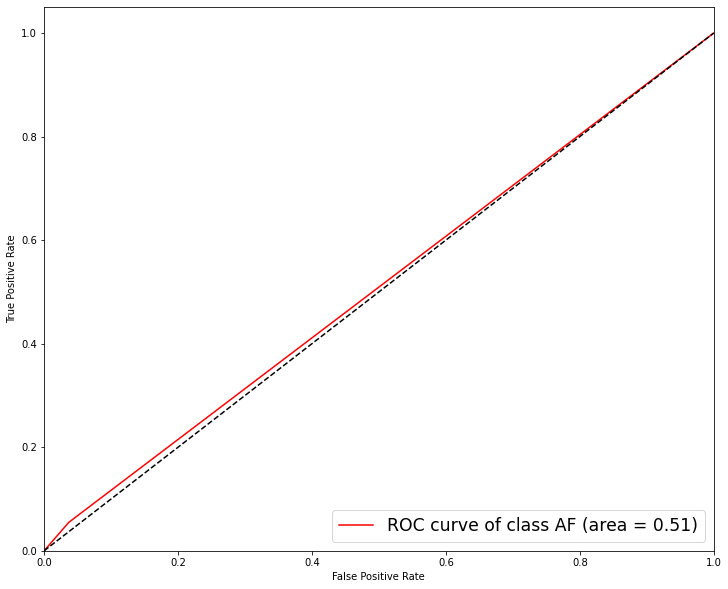

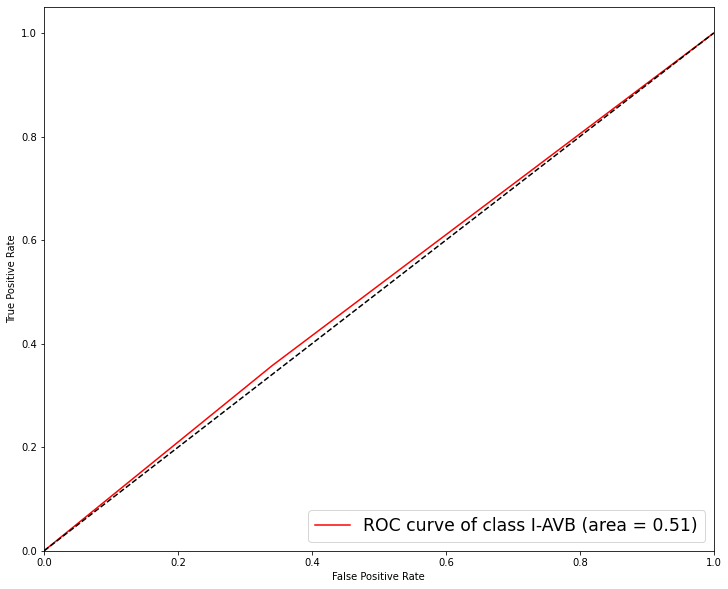

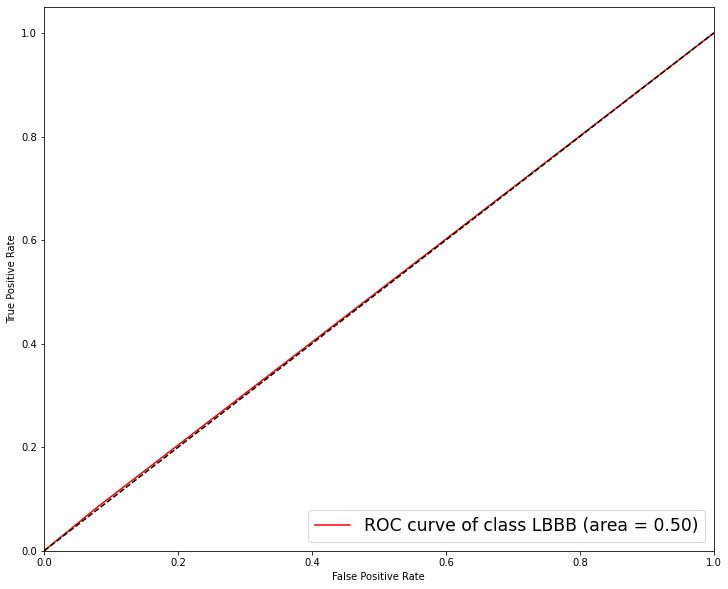

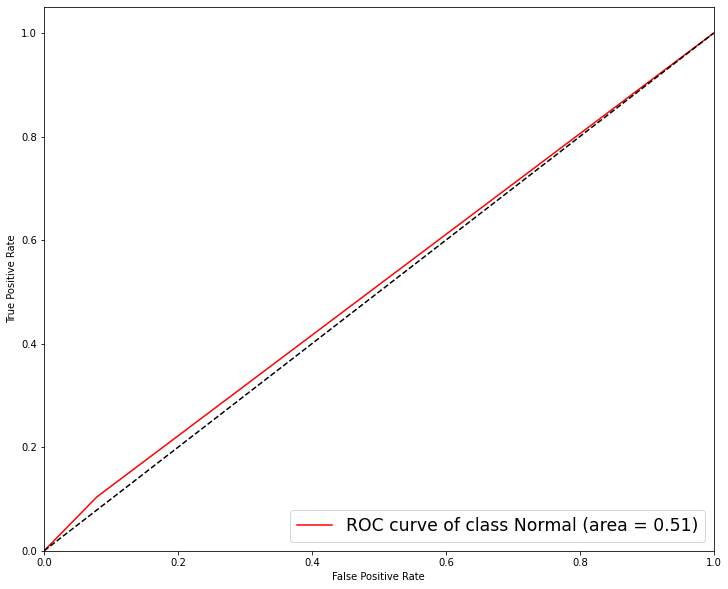

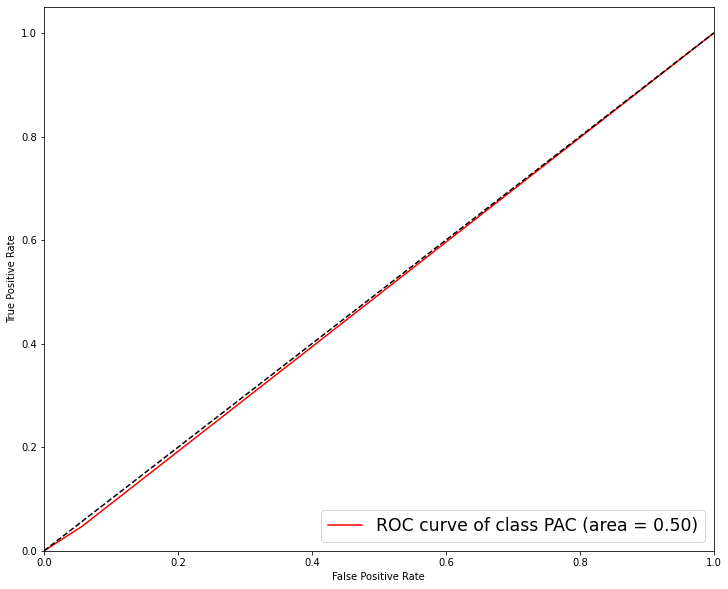

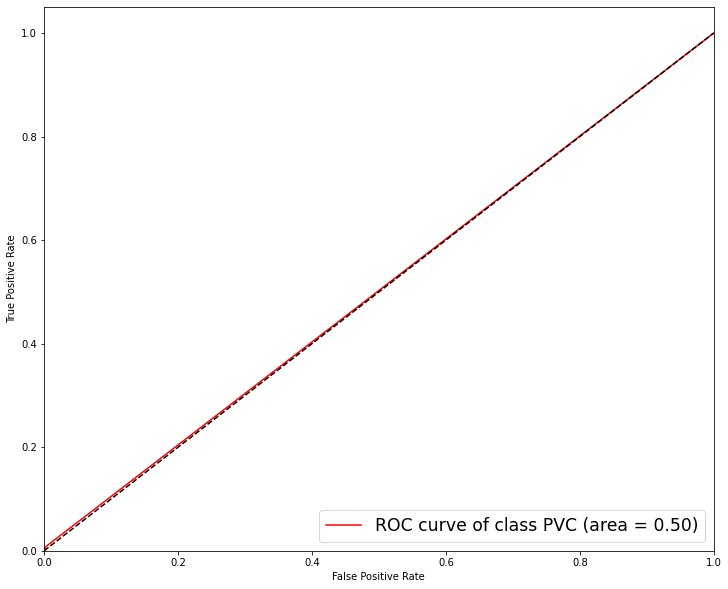

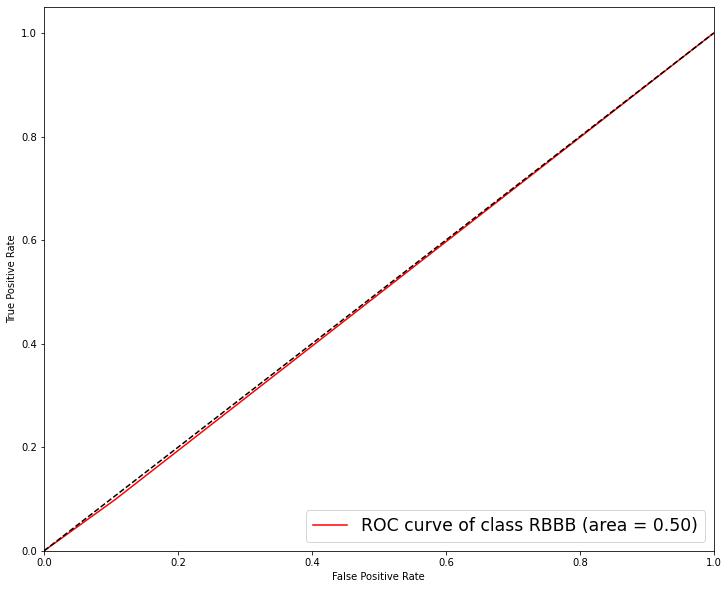

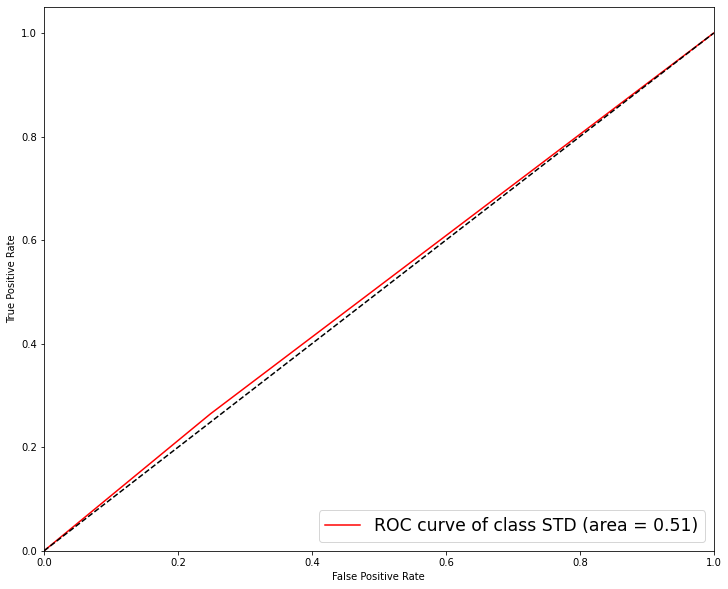

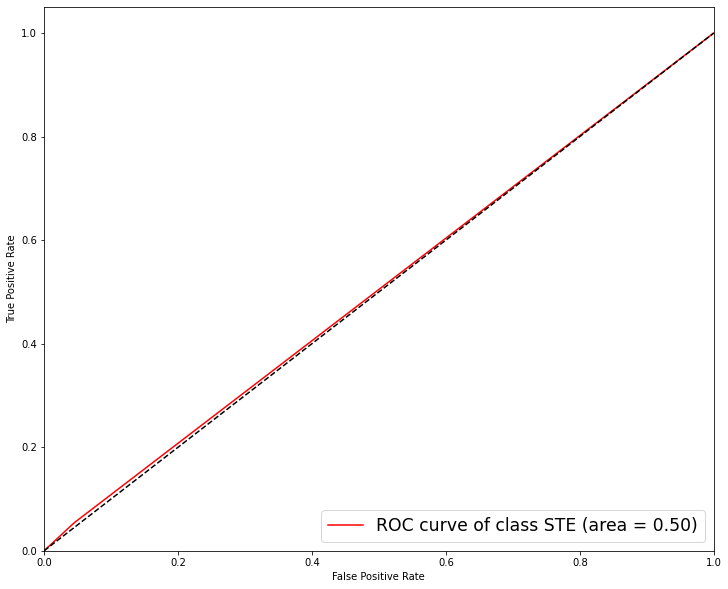

In [10]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 9
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted(['LBBB', 'STD', 'Normal', 'RBBB', 'AF', 'I-AVB', 'STE', 'PAC', 'PVC'])

# Plot all ROC curves
for i in range(9):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()

# Analiza wyników po użyciu dystansu (MSE) jako kryterium

In [11]:
csv_path="/home/puszkar/ecg/results/csv_outputs/03112020v2"
test_path = "/home/puszkar/ecg/data/test"

In [12]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0003
A0007
A0013
A0019
A0026
A0030
A0031
A0041
A0044
A0058
A0063
A0071
A0074
A0077
A0087
A0098
A0100
A0104
A0123
A0131
A0133
A0137
A0147
A0148
A0155
A0167
A0173
A0174
A0176
A0178
A0206
A0214
A0222
A0226
A0236
A0246
A0247
A0249
A0252
A0255
A0257
A0258
A0262
A0263
A0264
A0267
A0270
A0276
A0279
A0284
A0291
A0296
A0302
A0307
A0310
A0318
A0326
A0331
A0337
A0338
A0339
A0340
A0357
A0361
A0375
A0381
A0387
A0391
A0396
A0402
A0415
A0425
A0432
A0433
A0434
A0442
A0454
A0459
A0462
A0469
A0475
A0480
A0488
A0490
A0498
A0504
A0509
A0511
A0513
A0515
A0518
A0522
A0524
A0532
A0542
A0549
A0551
A0558
A0562
A0573
A0577
A0579
A0589
A0597
A0603
A0609
A0613
A0621
A0628
A0629
A0636
A0645
A0654
A0672
A0674
A0677
A0688
A0694
A0699
A0701
A0706
A0724
A0732
A0739
A0747
A0754
A0762
A0768
A0769
A0771
A0787
A0790
A0805
A0809
A0816
A0819
A0823
A0824
A0863
A0867
A0870
A0874
A0882
A0890
A0891
A0892
A0899
A0902
A0904
A0913
A0924
A0930
A0937
A0940
A0943
A0946
A0948
A0949
A0954
A0962
A0964
A0966
A0977
A0978
A0983
A0986
A098

In [13]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1] --> [0 0 0 0 0 0 0 0 1]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0] --> [1 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0] --> [0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[1 0 0 0 0 0 0 0 0] --> [1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 1 0 0] --> [0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 1 0 0 0] --> [0 0 0 0 0 1 0 0 0]
[0 0 0 1 0 0 0 0 0] --> [0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 1 0] --> [0 0 0 0 0 0 0 1 0]
[0 0 0 0 1 0 0 0 0] --> [0 0 0 0 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0] --> [0 0 0 0

131

[]

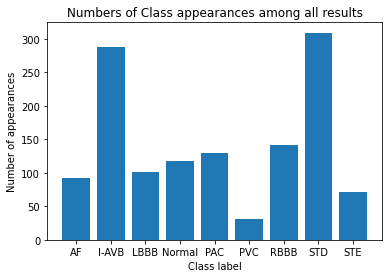

In [14]:
fig = plt.figure()
plt.bar(sorted(default_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [15]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

[]

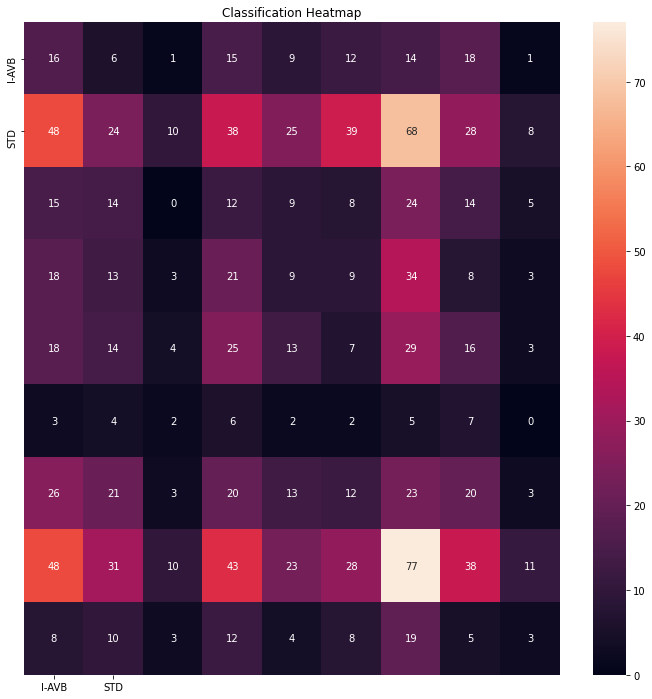

In [16]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric[:-1])
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


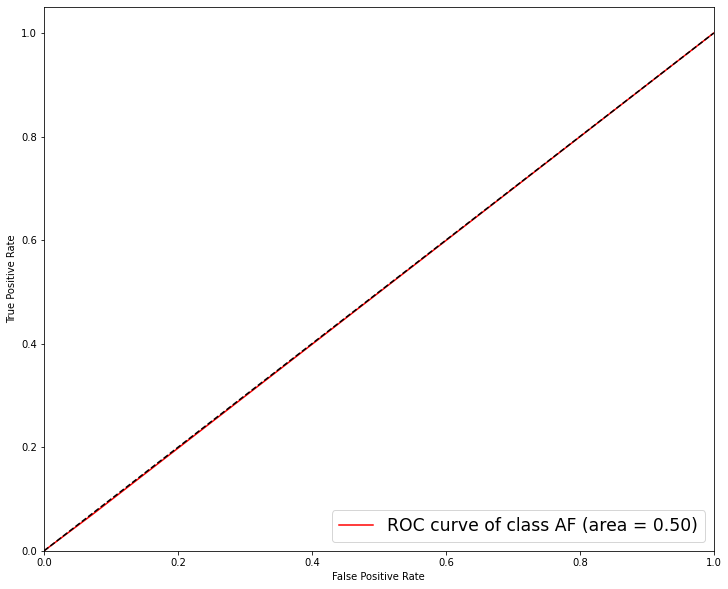

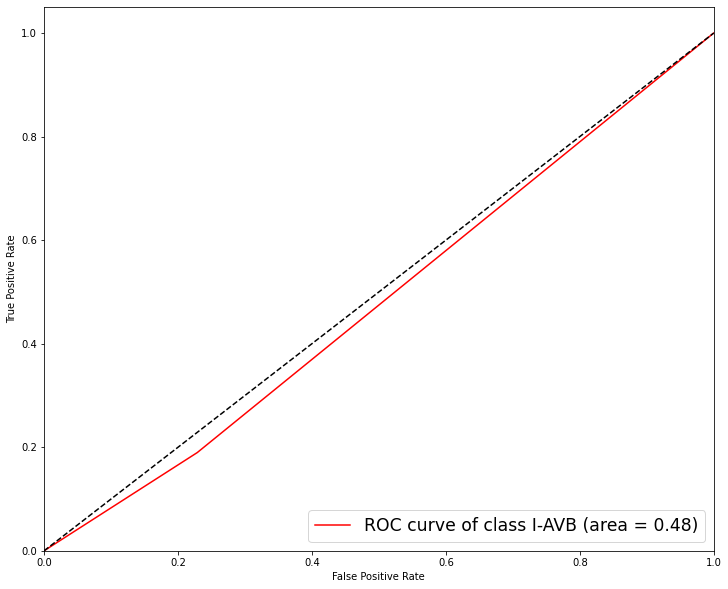

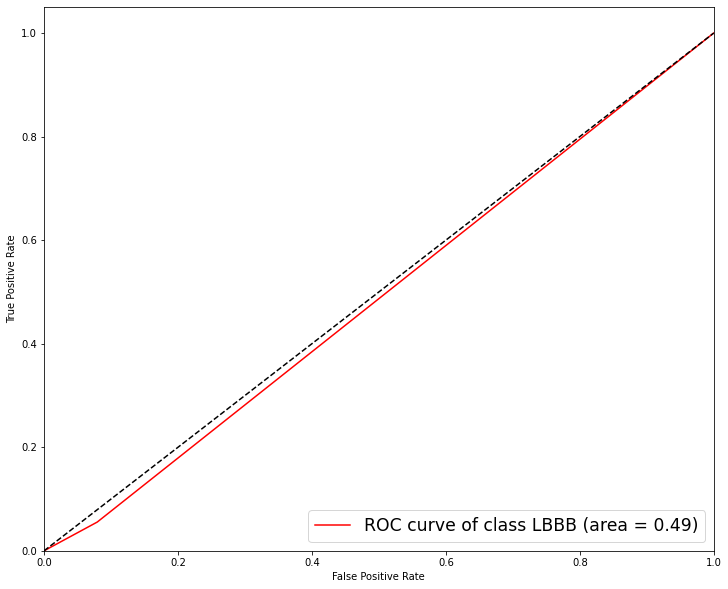

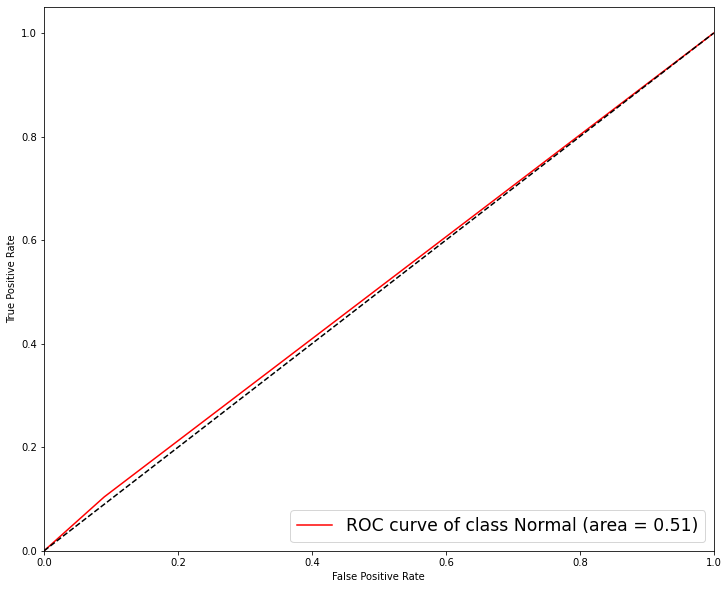

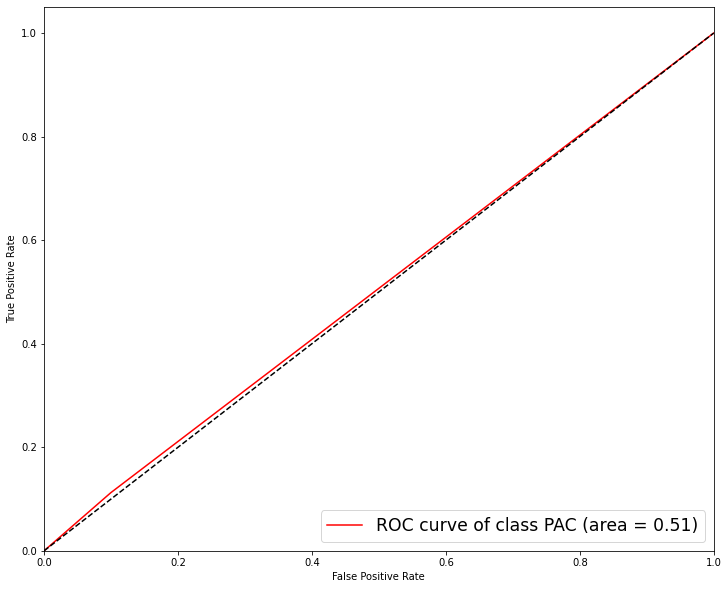

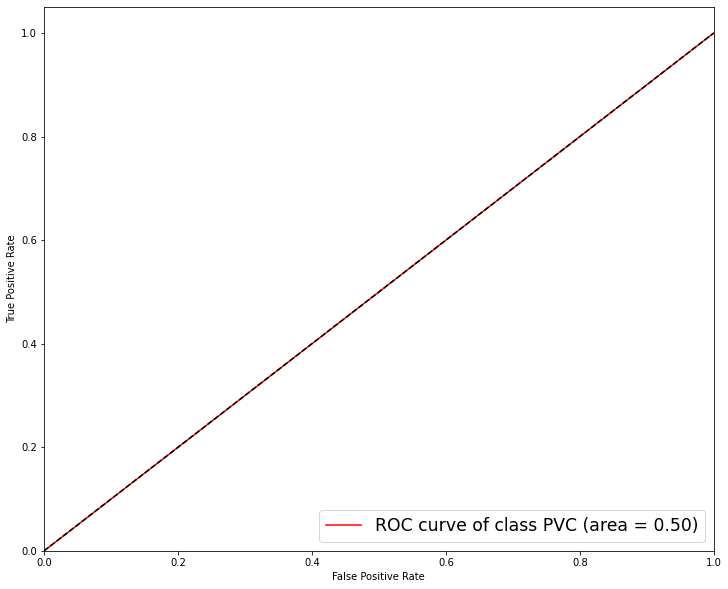

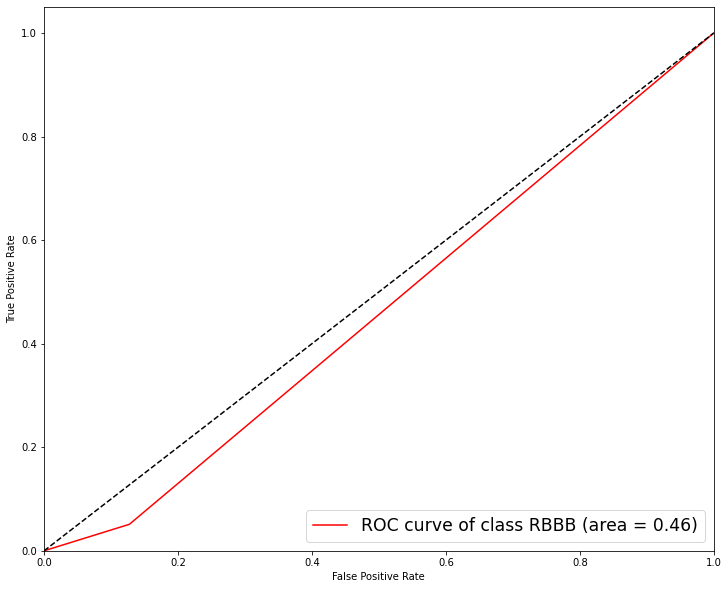

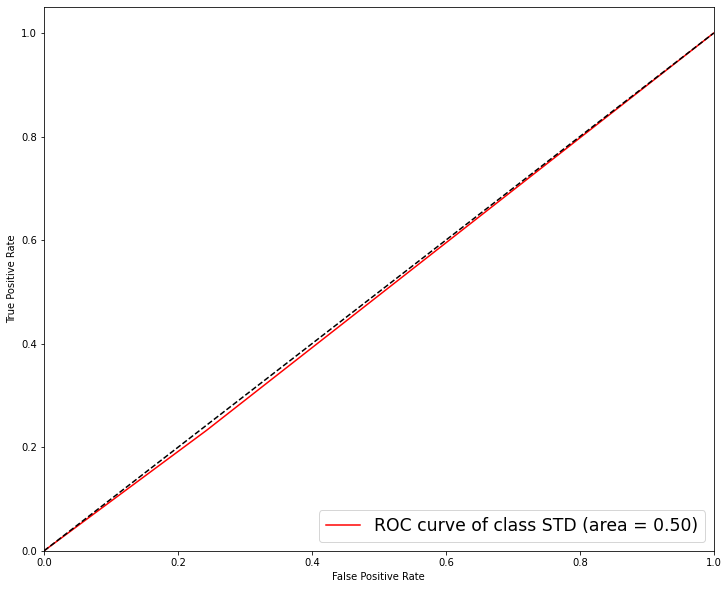

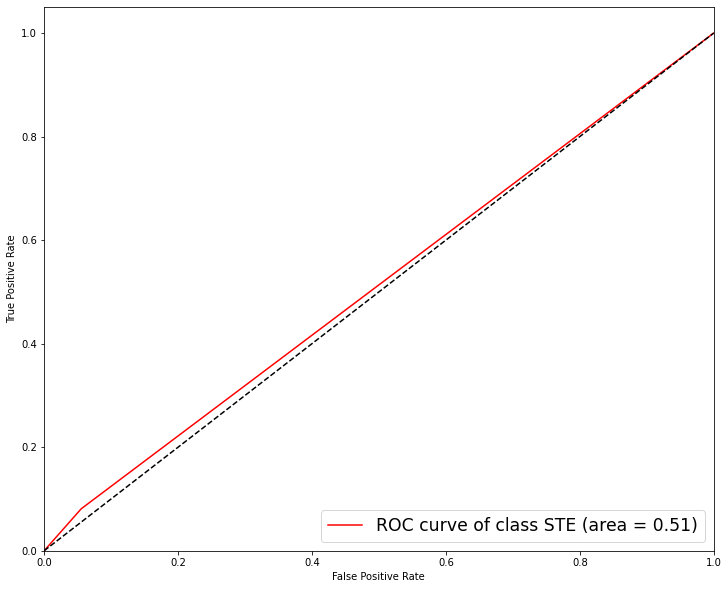

In [17]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 9
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted(['LBBB', 'STD', 'Normal', 'RBBB', 'AF', 'I-AVB', 'STE', 'PAC', 'PVC'])

# Plot all ROC curves
for i in range(9):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()

# Bipolar classification - two instances dataset classification analysis

In [18]:
csv_path="/home/puszkar/ecg/results/csv_outputs/RBBB-I-AVBtest3"
test_path = "/home/puszkar/ecg/data/RBBB-I-AVBtest" 

In [19]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0006
A0010
A0015
A0028
A0035
A0085
A0095
A0096
A0098
A0118
A0119
A0132
A0134
A0160
A0168
A0169
A0171
A0183
A0188
A0200
A0216
A0223
A0228
A0230
A0236
A0240
A0243
A0246
A0250
A0258
A0261
A0262
A0288
A0292
A0293
A0302
A0303
A0309
A0314
A0328
A0334
A0336
A0337
A0339
A0342
A0345
A0352
A0354
A0356
A0362
A0364
A0366
A0382
A0386
A0391
A0417
A0418
A0436
A0437
A0441
A0445
A0457
A0460
A0489
A0507
A0511
A0522
A0532
A0536
A0540
A0542
A0558
A0560
A0561
A0571
A0574
A0591
A0612
A0619
A0624
A0628
A0633
A0637
A0647
A0650
A0651
A0654
A0657
A0660
A0662
A0671
A0676
A0677
A0703
A0720
A0726
A0728
A0754
A0761
A0764
A0778
A0794
A0812
A0816
A0820
A0829
A0830
A0832
A0852
A0856
A0861
A0870
A0876
A0878
A0880
A0885
A0886
A0899
A0900
A0914
A0920
A0926
A0928
A0936
A0938
A0942
A0946
A0950
A0957
A0976
A0981
A1018
A1023
A1036
A1038
A1045
A1048
A1049
A1050
A1051
A1057
A1071
A1092
A1099
A1101
A1107
A1116
A1130
A1134
A1138
A1153
A1162
A1167
A1170
A1178
A1188
A1209
A1212
A1217
A1218
A1223
A1240
A1263
A1265
A1289
A1309
A131

In [20]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --

330

[]

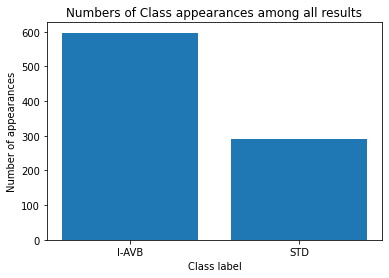

In [21]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [22]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

### Heatmap visualisation of class entities cuantity

[]

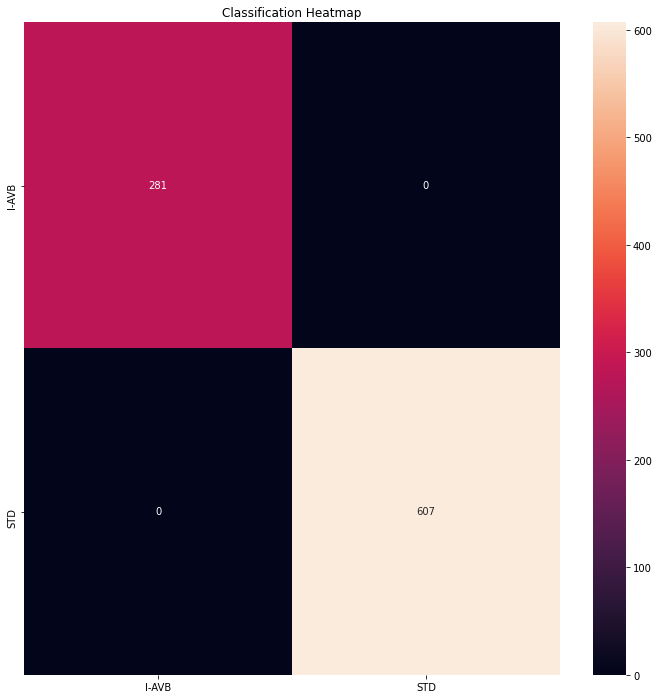

In [23]:
confusion = confusion_matrix(y_true_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

[]

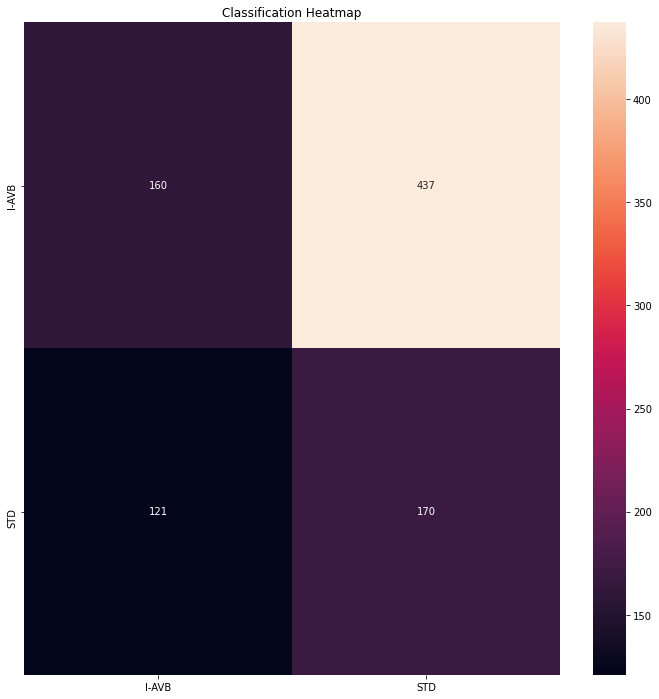

In [24]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


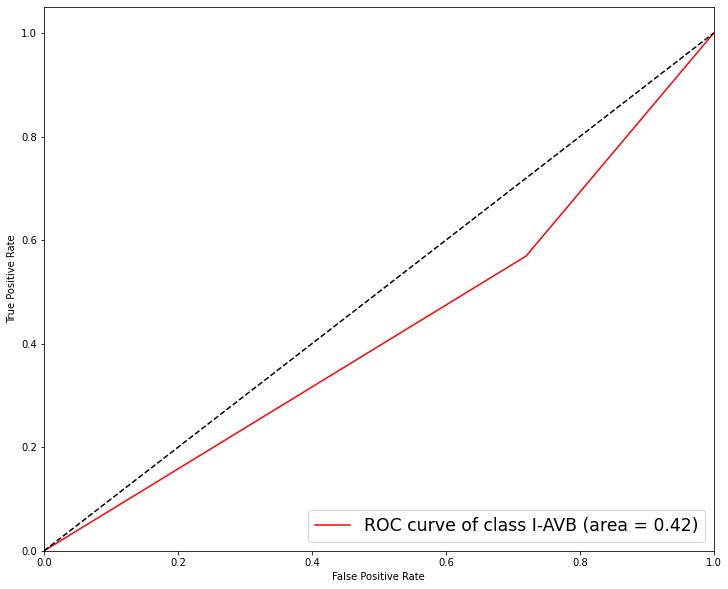

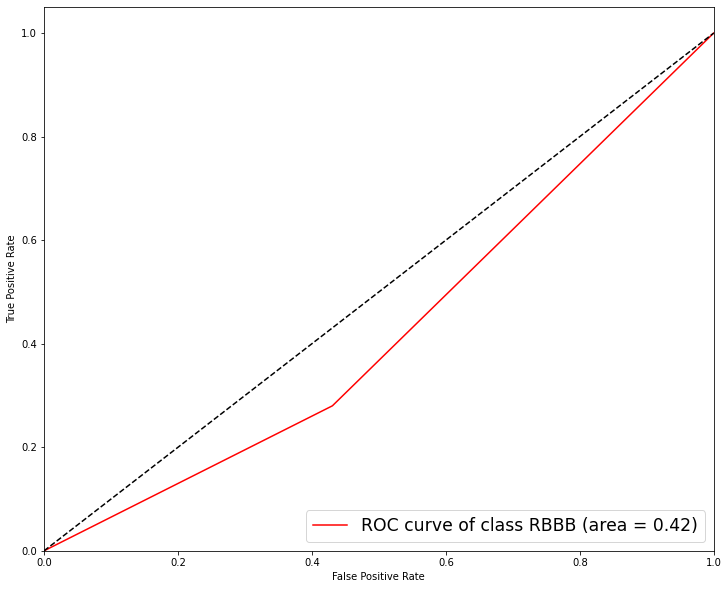

In [25]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted([ 'RBBB', 'I-AVB'])

# Plot all ROC curves
for i in range(2):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()

# DTW as classifying condition

In [26]:
csv_path="/home/puszkar/ecg/results/csv_outputs/RBBB-I-AVBtest4"
test_path = "/home/puszkar/ecg/data/RBBB-I-AVBtest" 

In [27]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0006
A0010
A0015
A0028
A0035
A0085
A0095
A0096
A0098
A0118
A0119
A0132
A0134
A0160
A0168
A0169
A0171
A0183
A0188
A0200
A0216
A0223
A0228
A0230
A0236
A0240
A0243
A0246
A0250
A0258
A0261
A0262
A0288
A0292
A0293
A0302
A0303
A0309
A0314
A0328
A0334
A0336
A0337
A0339
A0342
A0345
A0352
A0354
A0356
A0362
A0364
A0366
A0382
A0386
A0391
A0417
A0418
A0436
A0437
A0441
A0445
A0457
A0460
A0489
A0507
A0511
A0522
A0532
A0536
A0540
A0542
A0558
A0560
A0561
A0571
A0574
A0591
A0612
A0619
A0624
A0628
A0633
A0637
A0647
A0650
A0651
A0654
A0657
A0660
A0662
A0671
A0676
A0677
A0703
A0720
A0726
A0728
A0754
A0761
A0764
A0778
A0794
A0812
A0816
A0820
A0829
A0830
A0832
A0852
A0856
A0861
A0870
A0876
A0878
A0880
A0885
A0886
A0899
A0900
A0914
A0920
A0926
A0928
A0936
A0938
A0942
A0946
A0950
A0957
A0976
A0981
A1018
A1023
A1036
A1038
A1045
A1048
A1049
A1050
A1051
A1057
A1071
A1092
A1099
A1101
A1107
A1116
A1130
A1134
A1138
A1153
A1162
A1167
A1170
A1178
A1188
A1209
A1212
A1217
A1218
A1223
A1240
A1263
A1265
A1289
A1309
A131

In [28]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper


[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --

366

[]

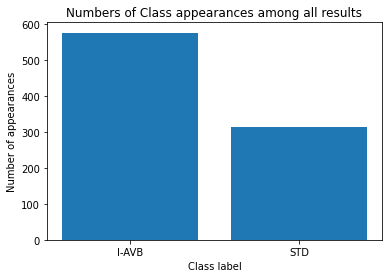

In [29]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [30]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

[]

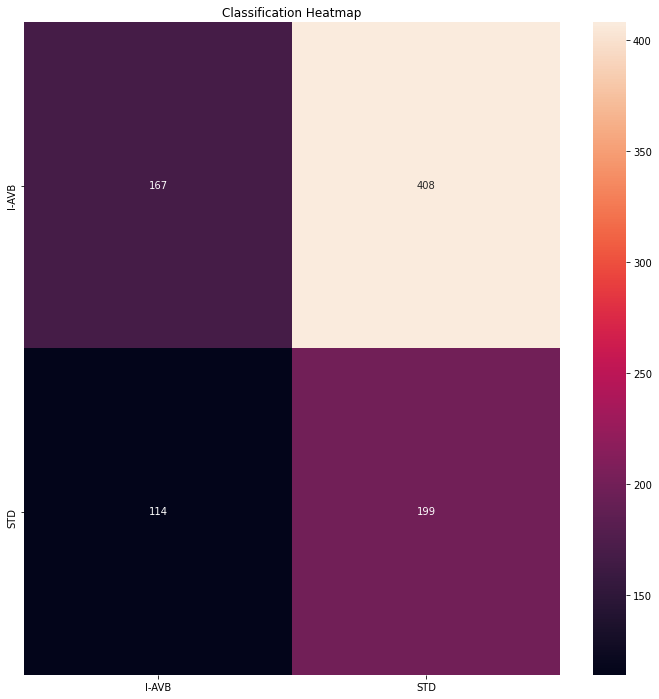

In [31]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


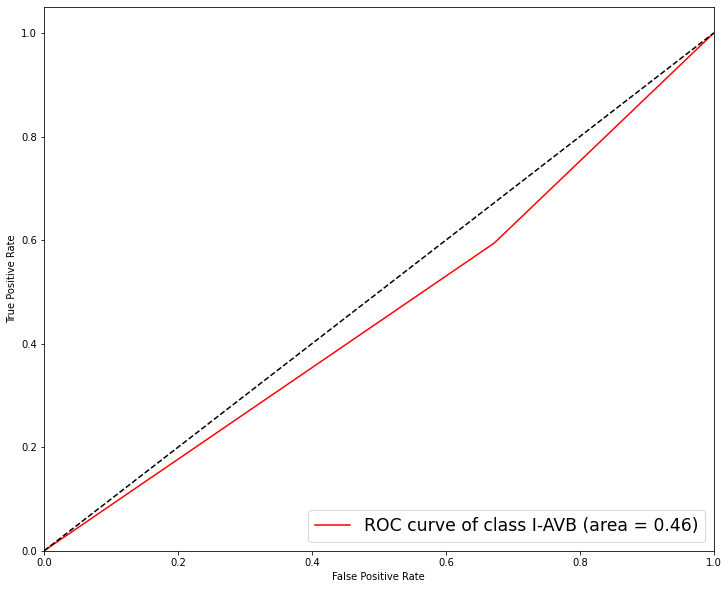

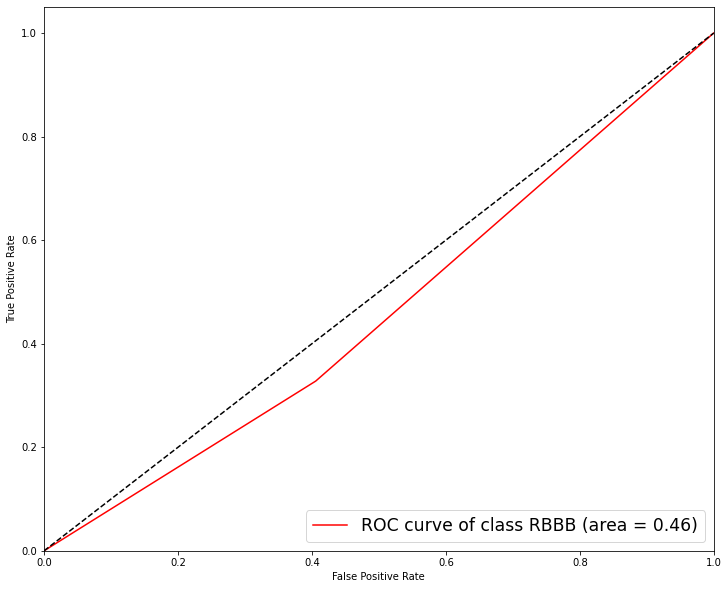

In [32]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted([ 'RBBB', 'I-AVB'])

# Plot all ROC curves
for i in range(2):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()

In [33]:
csv_path="/home/puszkar/ecg/results/csv_outputs/RBBB-I-AVBtest6"
test_path = "/home/puszkar/ecg/data/RBBB-I-AVBtest" 

In [34]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0006
A0010
A0015
A0028
A0035
A0085
A0095
A0096
A0098
A0118
A0119
A0132
A0134
A0160
A0168
A0169
A0171
A0183
A0188
A0200
A0216
A0223
A0228
A0230
A0236
A0240
A0243
A0246
A0250
A0258
A0261
A0262
A0288
A0292
A0293
A0302
A0303
A0309
A0314
A0328
A0334
A0336
A0337
A0339
A0342
A0345
A0352
A0354
A0356
A0362
A0364
A0366
A0382
A0386
A0391
A0417
A0418
A0436
A0437
A0441
A0445
A0457
A0460
A0489
A0507
A0511
A0522
A0532
A0536
A0540
A0542
A0558
A0560
A0561
A0571
A0574
A0591
A0612
A0619
A0624
A0628
A0633
A0637
A0647
A0650
A0651
A0654
A0657
A0660
A0662
A0671
A0676
A0677
A0703
A0720
A0726
A0728
A0754
A0761
A0764
A0778
A0794
A0812
A0816
A0820
A0829
A0830
A0832
A0852
A0856
A0861
A0870
A0876
A0878
A0880
A0885
A0886
A0899
A0900
A0914
A0920
A0926
A0928
A0936
A0938
A0942
A0946
A0950
A0957
A0976
A0981
A1018
A1023
A1036
A1038
A1045
A1048
A1049
A1050
A1051
A1057
A1071
A1092
A1099
A1101
A1107
A1116
A1130
A1134
A1138
A1153
A1162
A1167
A1170
A1178
A1188
A1209
A1212
A1217
A1218
A1223
A1240
A1263
A1265
A1289
A1309
A131

In [35]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --

312

[]

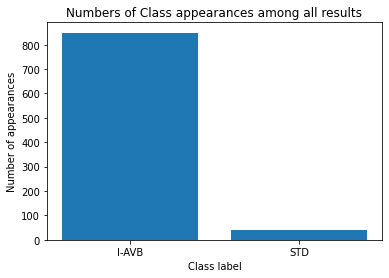

In [36]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [37]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

[]

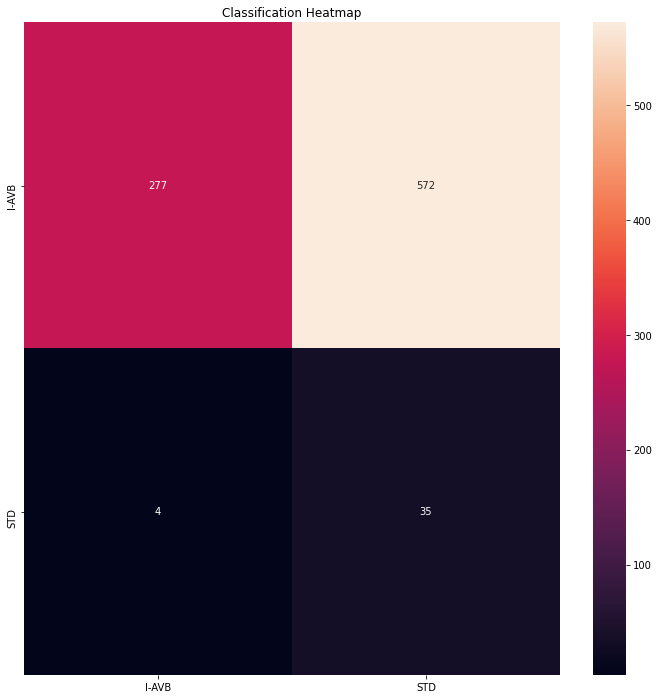

In [38]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


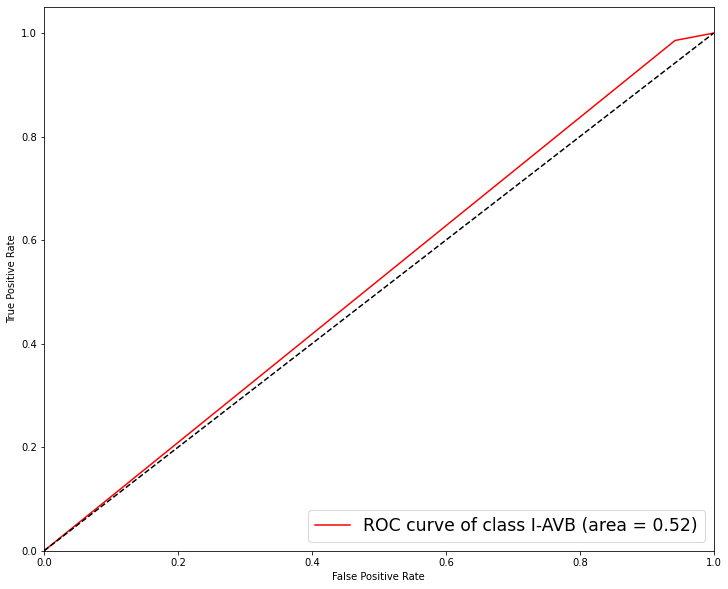

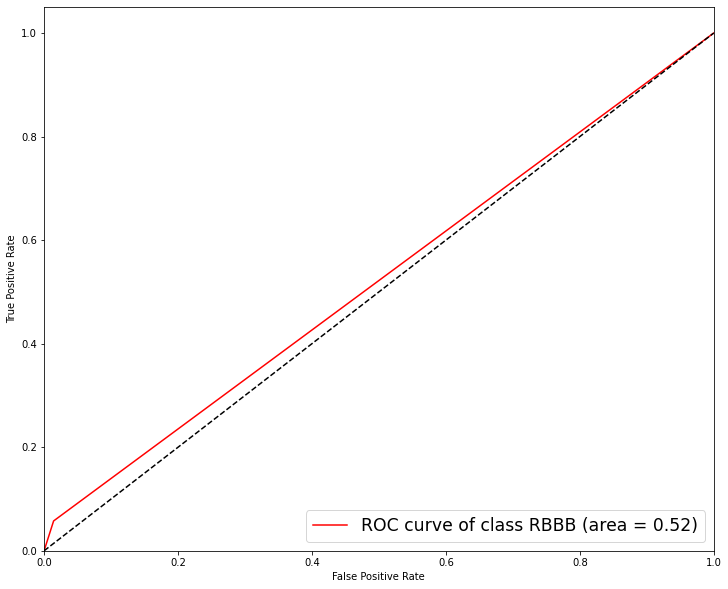

In [39]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted([ 'RBBB', 'I-AVB'])

# Plot all ROC curves
for i in range(2):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()

In [40]:
csv_path="/home/puszkar/ecg/results/csv_outputs/RBBB-I-AVBtest7"
test_path = "/home/puszkar/ecg/data/RBBB-I-AVBtest" 

In [41]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0006
A0010
A0015
A0028
A0035
A0085
A0095
A0096
A0098
A0118
A0119
A0132
A0134
A0160
A0168
A0169
A0171
A0183
A0188
A0200
A0216
A0223
A0228
A0230
A0236
A0240
A0243
A0246
A0250
A0258
A0261
A0262
A0288
A0292
A0293
A0302
A0303
A0309
A0314
A0328
A0334
A0336
A0337
A0339
A0342
A0345
A0352
A0354
A0356
A0362
A0364
A0366
A0382
A0386
A0391
A0417
A0418
A0436
A0437
A0441
A0445
A0457
A0460
A0489
A0507
A0511
A0522
A0532
A0536
A0540
A0542
A0558
A0560
A0561
A0571
A0574
A0591
A0612
A0619
A0624
A0628
A0633
A0637
A0647
A0650
A0651
A0654
A0657
A0660
A0662
A0671
A0676
A0677
A0703
A0720
A0726
A0728
A0754
A0761
A0764
A0778
A0794
A0812
A0816
A0820
A0829
A0830
A0832
A0852
A0856
A0861
A0870
A0876
A0878
A0880
A0885
A0886
A0899
A0900
A0914
A0920
A0926
A0928
A0936
A0938
A0942
A0946
A0950
A0957
A0976
A0981
A1018
A1023
A1036
A1038
A1045
A1048
A1049
A1050
A1051
A1057
A1071
A1092
A1099
A1101
A1107
A1116
A1130
A1134
A1138
A1153
A1162
A1167
A1170
A1178
A1188
A1209
A1212
A1217
A1218
A1223
A1240
A1263
A1265
A1289
A1309
A131

In [42]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --

354

[]

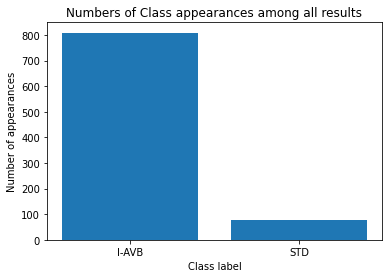

In [43]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [44]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

[]

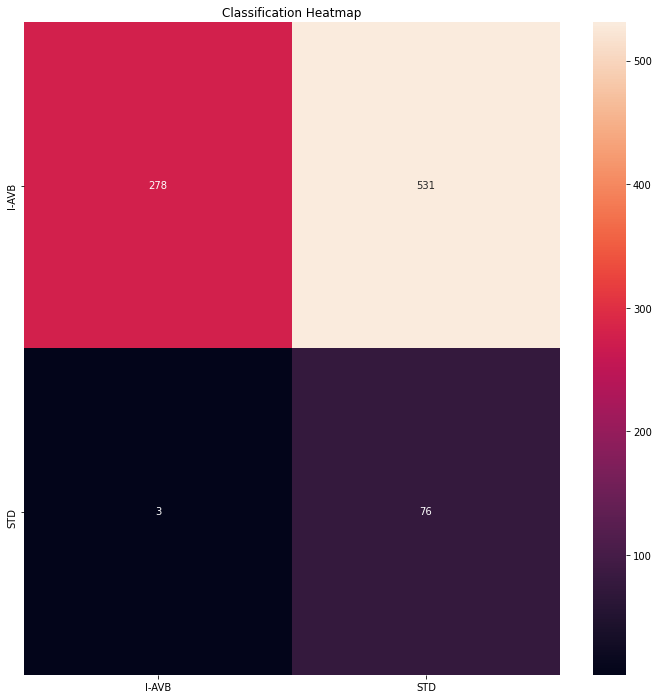

In [45]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


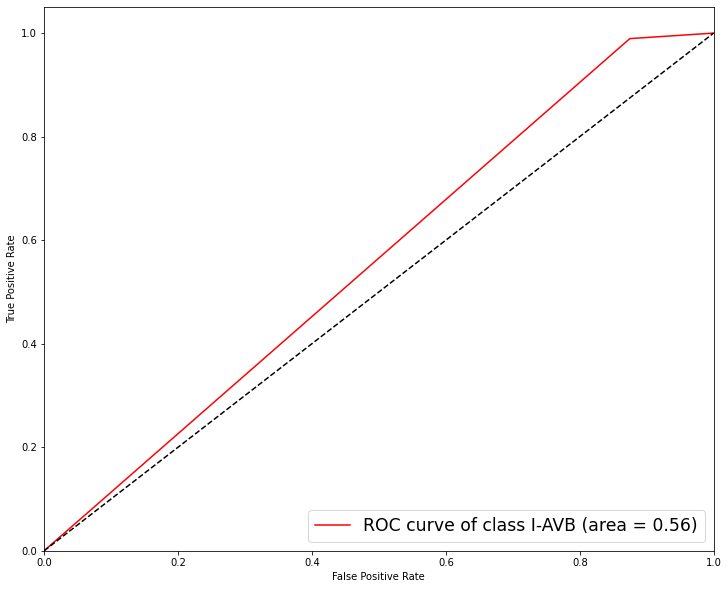

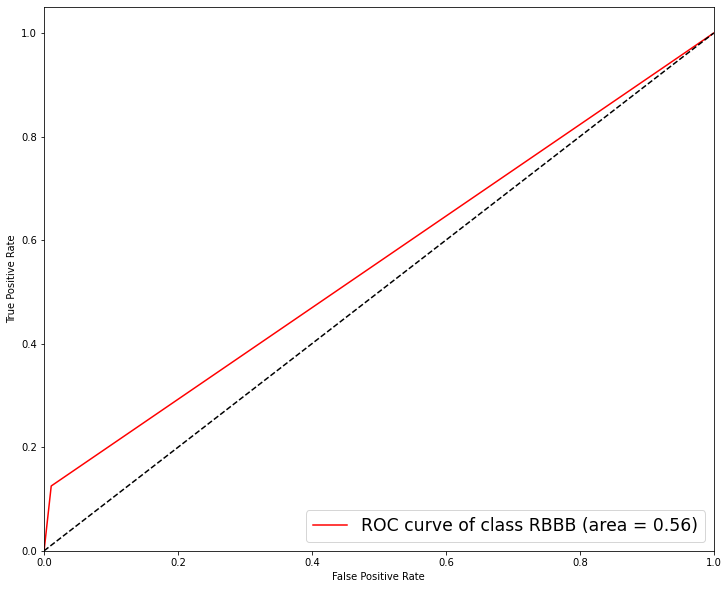

In [46]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted([ 'RBBB', 'I-AVB'])

# Plot all ROC curves
for i in range(2):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()

# STD-I-AVB Huber

In [47]:
csv_path="/home/puszkar/ecg/results/csv_outputs/STD-I-AVB-fastdtw"
test_path = "/home/puszkar/ecg/data/STD-I-AVBtest" 

In [48]:
auroc,auprc,accuracy,f_measure,Fbeta_measure,Gbeta_measure, y_true, y_pred, y_pred_proba = evaluate_12ECG_score(test_path, csv_path)
print(f"AUROC: {auroc}, AUPRC: {auprc}, Accuracy: {accuracy}, F-measure: {f_measure}, F-Beta measure: {Fbeta_measure}, G-Beta measure: {Gbeta_measure}")

A0013
A0014
A0042
A0048
A0060
A0077
A0092
A0100
A0104
A0110
A0111
A0118
A0128
A0132
A0165
A0172
A0185
A0187
A0194
A0201
A0240
A0243
A0246
A0248
A0262
A0263
A0282
A0297
A0301
A0320
A0336
A0340
A0368
A0381
A0386
A0400
A0402
A0408
A0417
A0428
A0434
A0449
A0501
A0538
A0542
A0562
A0568
A0581
A0585
A0596
A0599
A0621
A0623
A0651
A0654
A0687
A0702
A0714
A0729
A0732
A0735
A0754
A0758
A0786
A0792
A0810
A0818
A0820
A0842
A0844
A0866
A0868
A0871
A0917
A0942
A0960
A0962
A0976
A0988
A1011
A1020
A1052
A1058
A1062
A1078
A1090
A1099
A1111
A1112
A1130
A1173
A1207
A1253
A1263
A1279
A1283
A1290
A1302
A1330
A1356
A1370
A1394
A1402
A1403
A1407
A1416
A1422
A1428
A1431
A1442
A1445
A1460
A1486
A1488
A1492
A1494
A1500
A1512
A1521
A1533
A1537
A1548
A1554
A1564
A1577
A1581
A1594
A1614
A1618
A1633
A1638
A1652
A1669
A1687
A1691
A1696
A1697
A1703
A1709
A1716
A1719
A1723
A1726
A1735
A1747
A1759
A1763
A1787
A1790
A1800
A1805
A1819
A1828
A1848
A1855
A1894
A1907
A1909
A1922
A1925
A1936
A1939
A1974
A1982
A1985
A2005
A201

In [49]:
count_of_signals_proper = 0
for x, row in enumerate(y_pred):
    if simmilar(row, y_true[x]):
        print(row, "-->", y_true[x])
        count_of_signals_proper+=1
count_of_signals_proper

[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[0 1] --> [0 1]
[0 1] --> [0 1]
[1 0] --> [1 0]
[1 0] --> [1 0]
[1 0] --> [1 0]
[0 1] --> [0 1]
[1 0] --

320

[]

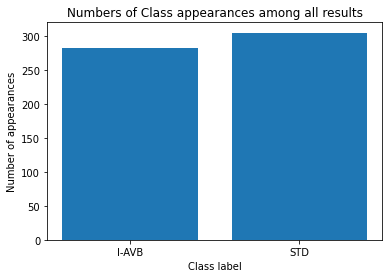

In [55]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_true.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

[]

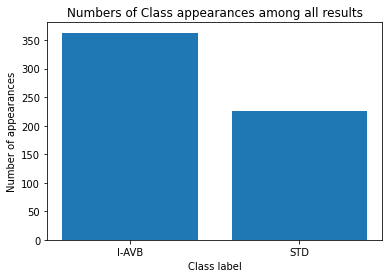

In [50]:
fig = plt.figure()
plt.bar(sorted(exp_net_params["classes"]), y_pred.sum(axis=0))
plt.title("Numbers of Class appearances among all results")
plt.xlabel("Class label")
plt.ylabel("Number of appearances")
plt.plot()

In [51]:
y_pred_numeric = numeric_classes(y_pred)
y_true_numeric = numeric_classes(y_true)

[]

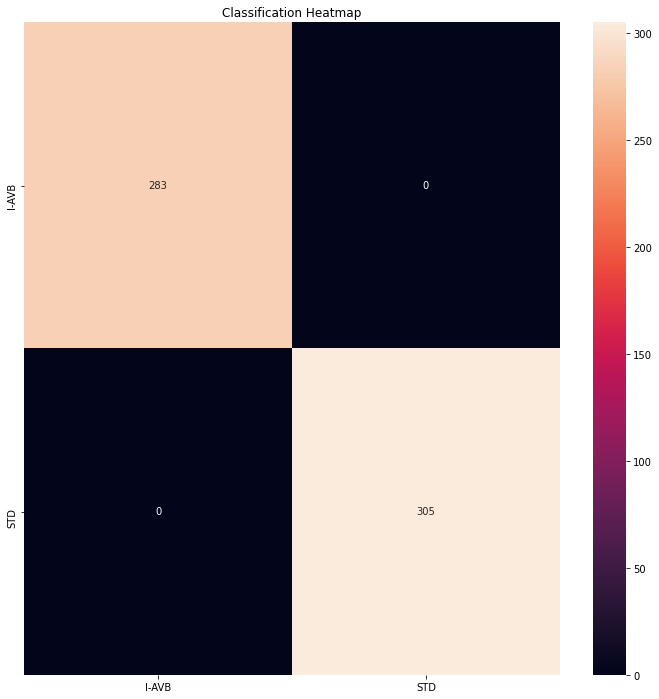

In [52]:
confusion = confusion_matrix(y_true_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

[]

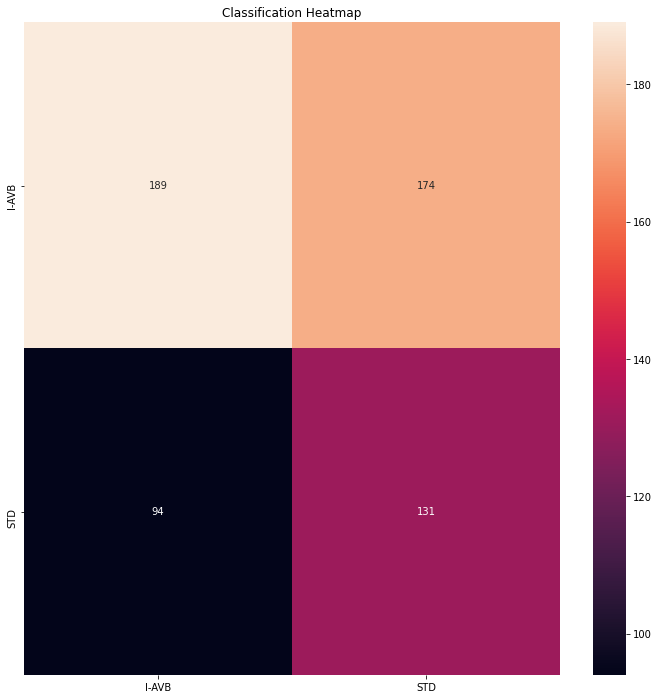

In [53]:
confusion = confusion_matrix(y_pred_numeric, y_true_numeric)
fig = plt.figure(figsize=(12,12))
plt.title("Classification Heatmap")
sns.heatmap(confusion, annot=True, cbar=True, xticklabels=sorted(exp_net_params["classes"]), yticklabels=sorted(exp_net_params["classes"]), fmt="g")
plt.plot()

/home/puszkar/ecg/ecg/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


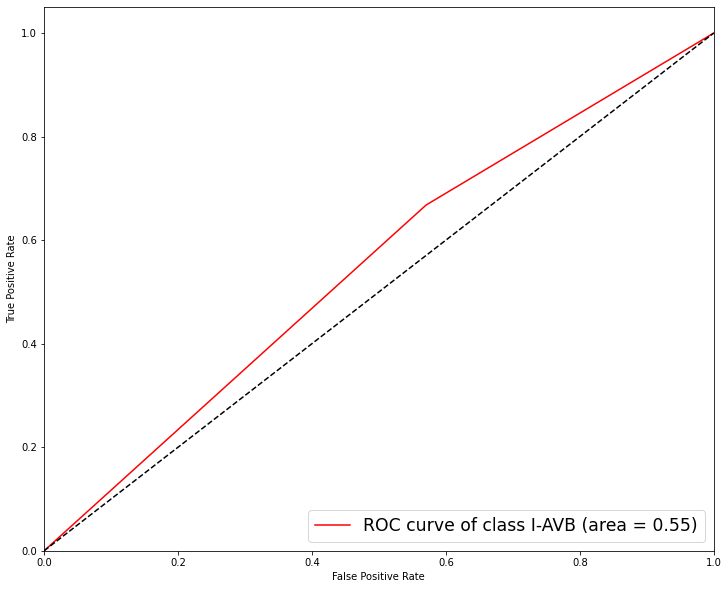

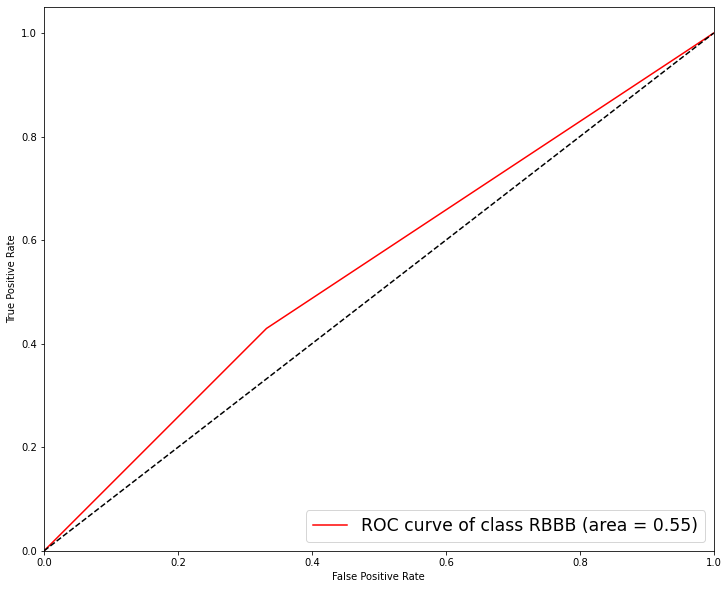

In [54]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

color="red"
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
classes = sorted([ 'RBBB', 'I-AVB'])

# Plot all ROC curves
for i in range(2):
    plt.figure(figsize=(12,10))
    colors = cycle(['aqua', 'darkorange'])
    plt.plot(fpr[i], tpr[i], color=color,
        label='ROC curve of class {0} (area = {1:0.2f})'
        ''.format(classes[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right", fontsize="xx-large")
    plt.show()